# Exponential Integrate-and-Fire model

In [2]:
import sys 
sys.path.append('/home/timothysit/anaconda3/envs/bmnn/lib/python2.7/site-packages')
import warnings
warnings.filterwarnings('ignore')

nr of spikes: 7


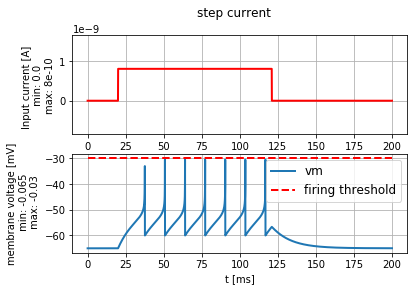

In [2]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

Why does it say that there are 7 spikes, when it seems that the first volage bump was not large enough to elicit a spike?

## Rheobase threshold

The exponential integrate-and-fire neuron has two threshold-related parameters: 
    
1. `v_spike`
2. `v_rheobase`

**simulation exercise**: modify the code example given above and set the function parameter `v_spike` to +10 mV (from the default value of -30 mV). What do you expect to happen? How many spikes will be generated?

my answer: 
- I expect there to be fewer spikes 
- Since the threshold is increased, and so it may be that the first spike occurs later (in the input current train)
- But I am not sure if there will be *no* spikes since it seems that the membrane voltage can increase quite rapidly 

nr of spikes: 7


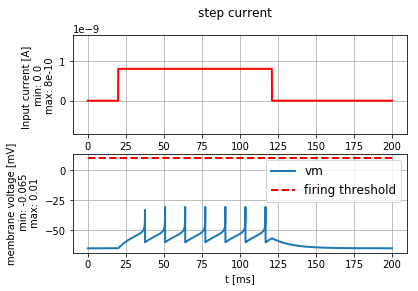

In [9]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

custom_v_spike = +10. * b2.mV

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_spike = custom_v_spike, simulation_time=200*b2.ms)

# print('Firing threshold:', exp_IF.FIRING_THRESHOLD_v_spike)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=custom_v_spike)

#plot_tools.plot_voltage_and_current_traces(
#    state_monitor, input_current,title="step current",
#    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

It seems that changing `v_spike` did not affect the number of spikes. but It is stranged that `exp_IF.FIRING_THRESHOLD_v_spike` is not changed...

Let me try changing `v_rheobase`

nr of spikes: 0


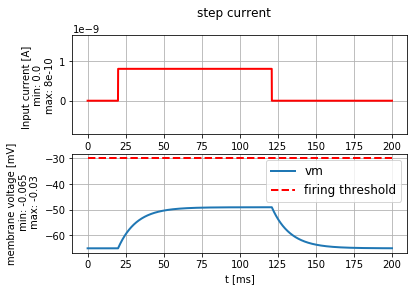

In [8]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory


input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_rheobase = +10. * b2.mV, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

**theory exercise**: compute the minimal amplitude $I_\text{rh}$ of a constant input current such that the neuron will elicit a spike.

I first write down the differential equation for the exponential integrate-and-fire model: 

$$
\tau \frac{\mathrm{d}}{\mathrm{d}t}u = -(u - u_\text{rest}) + \Delta_T \exp \left( \frac{u - \theta_\text{rh}}{\Delta_T} \right) + RI
$$

For $\Delta_T \rightarrow 0$ (ie. we have a very 'sharp' increase after the potential is above the rheobase threhsold, we can approximate the equation as a linear passive membrane model:

$$
\tau \frac{\mathrm{d}}{\mathrm{d}t}u = -(u - u_\text{rest}) + RI
$$

Therefore, we can use the solution to the linear passive membrane differential equation:

$$
u(t) = u_\text{rest} + RI(1 - \exp(-(t-t_0)/\tau) 
$$

wherefore for large $t - t_0$ we can assume: 

$$
u(t) = u_\text{rest} + RI
$$

setting that membrane potential to the level we want $u(t) = \theta_\text{rh}$, and denoting the current at that point as $I_\text{rh}$, we get:

$$
I_\text{rh} = \frac{\theta_\text{rh} - u_\text{rest}}{R}
$$


In [6]:
theta_rh = -55.0 * b2.mV
u_rest = -65.0 * b2.mV
R = 20.0 * b2.Mohm
I_rh = (theta_rh - u_rest) / R
print('Minimum current to trigger spike', I_rh)

('Minimum current to trigger spike', 0.5 * namp)


nr of spikes: 8


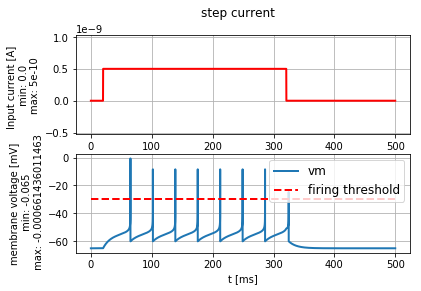

In [20]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_rheobase = theta_rh, v_spike = 10 * b2.mV, simulation_time=500*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

We try to slightly decrease the current injected

nr of spikes: 0


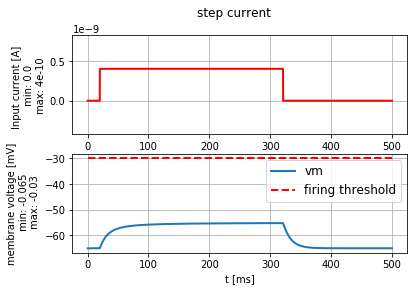

In [22]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh - 0.1*b2.nA)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_rheobase = theta_rh, v_spike = 10 * b2.mV, simulation_time=500*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

We find that there are no spikes. 

- note that this only works when `v_spike` is sufficiently high so that for the duration of the step current, $u(t) < \theta_{spike}$
- and when $u(t) > \theta_\text{rh}$ there will be repetitive firing

As an illustration, let's put `v_spike` back to the original value of -30 mV, and apply a current slightly smaller than `I_rh`. Notice that although there is spike firing, it is not at the maximum rate. There are still spikes because although part of the du/dt curve is still negative, the current is sufficient to push the potential through the negative part of the du/dt curve to the positive part.

When the current is equal or greater than `I_rh`, all parts of the du/dt curve is positive, and so any potential will quickly increase and cause a spike by passing `v_spike`.

nr of spikes: 5


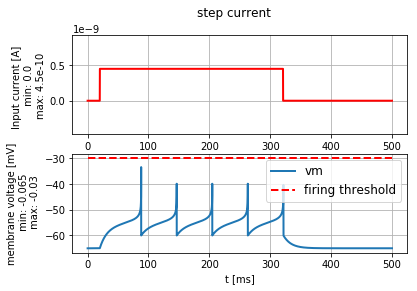

In [28]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh - 0.05 * b2.nA)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_rheobase = theta_rh, v_spike = -30 * b2.mV, simulation_time=500*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## Strength-duration curve

- the minimal amplitude to elicit a spiek depends on the duration of the current (since what matters in the end is the amount of charge)
- fort short pulse and step current, you can 'experimentally' determine the minimal current 
- the *strength-duration curve* is a plot of the amplitude versus duration of current required to elicit a spike


**simulation exercise** 

- in the code below are two lists, the duration of the current and the minimum amplitude to elicit a spike 
- notice that some of the values of minimum ampliude are set to 0 (they are incomplete)
- your task is to find those values 

You can find those values using the following method:

- set the index to 0 (which control which element of `durations` to set the current)
- enter an informed gueuss into the `min_amp` list 
- run script, and modify the value until you get just one spike 
- do the same for `i=2` and `i=6`

nr of spikes: 1


Text(0,0.5,'min amplitude [nAmp]')

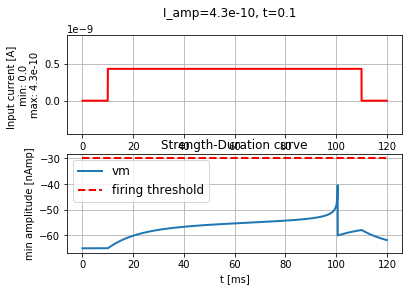

In [31]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

i=6#change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [8.58, 4.42, 1.95, 1.10, .70, .48, 0.43]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

Plotting the strength-duration curve 

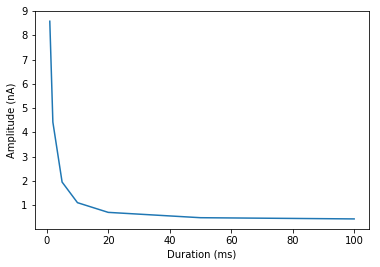

In [36]:
plt.figure()
plt.plot(durations, min_amp)
plt.xlabel('Duration (ms)')
plt.ylabel('Amplitude (nA)')
plt.show()

In [ ]:
plt.figure()
plt.plot(np.log(durations), np.log(min_amp))
plt.xlabel('Duration (ms)')
plt.ylabel('Amplitude (nA)')
plt.show()